<a href="https://colab.research.google.com/github/dineshrawat0803/BikeCaseStudy_SLR_Model/blob/main/CNN_Demo_Upgrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

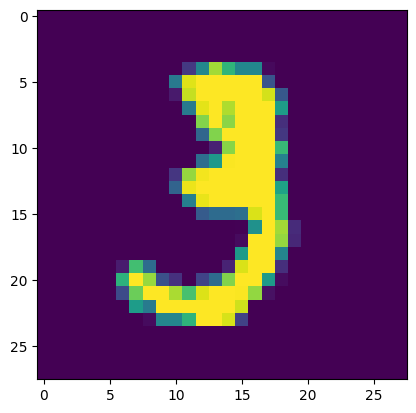

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

In [ ]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[10]

3

In [ ]:
X_train = X_train.reshape(60000,28,28,1)

In [ ]:
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

model = Sequential()
model.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

In [ ]:
model.compile(optimizer = "adam", loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history =model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.4260 - accuracy: 0.9296 - val_loss: 0.0961 - val_accuracy: 0.9729
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0794 - accuracy: 0.9770 - val_loss: 0.1008 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0563 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0569 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0632 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0553 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0610 -

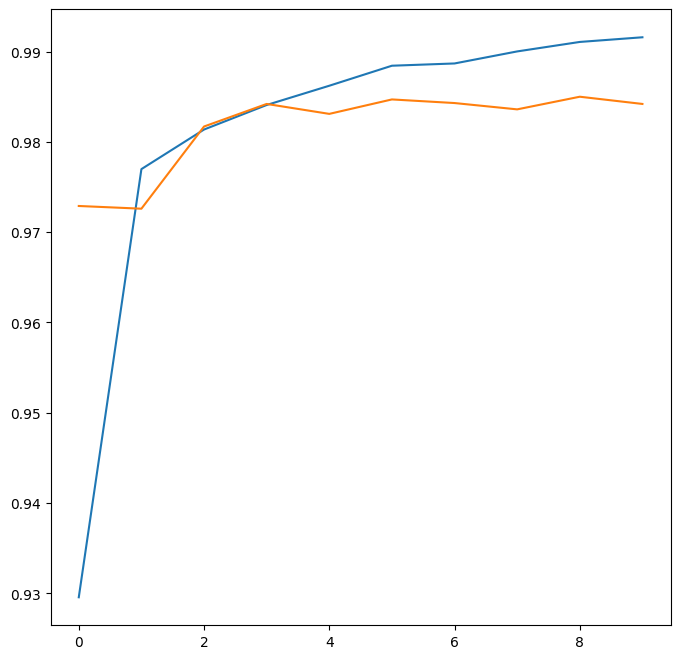

In [ ]:
from keras.backend_config import epsilon
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8,8))
plt.plot(epochs_range,acc,label='Training_accuracy')
plt.plot(epochs_range,val_acc,label='Validation accuracy')
plt.show()



In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)